### Two peak model Humburger moment problem
This notebook takes 1800s in Analytic continuation.  
The broaden parameter $\eta$ is chosen to be smaller than all energy scales of the system.  
To try this notebook, please install the fllowing package
- Plots
- LaTexStrings
- SparseIR

In [1]:
#load package
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(128)

128

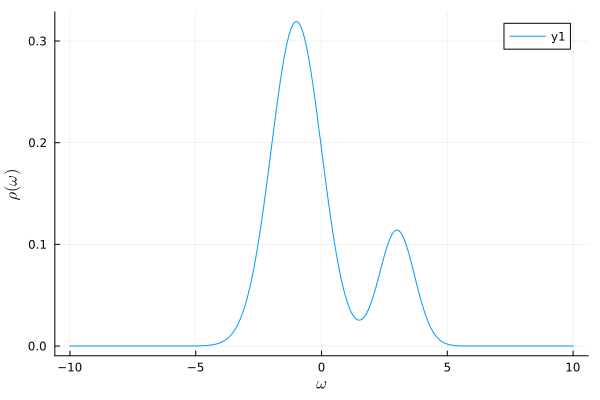

In [3]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.0) + 0.2*gaussian(omega, 3, 0.7)
omegas = LinRange(-10, 10, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 1000. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.0001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
moments = Complex{T}.([1., -0.2, 3.498, 3.082, 29.6361, 56.4209, 345.471, 895.443, 4830.75, 14800.3, 76894., 262127., 1.35768*10^6, 4.99111*10^6])
moments1  = moments[1:1]
moments3  = moments[1:3]
moments5  = moments[1:5]
moments7  = moments[1:7]
moments9  = moments[1:9]
moments11 = moments[1:11]
moments13 = moments[1:13]
;

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments1, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol1  = Nevanlinna.HamburgerNevanlinnaSolver(moments1, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol3  = Nevanlinna.HamburgerNevanlinnaSolver(moments3, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol5  = Nevanlinna.HamburgerNevanlinnaSolver(moments5, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol7  = Nevanlinna.HamburgerNevanlinnaSolver(moments7, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol9  = Nevanlinna.HamburgerNevanlinnaSolver(moments9, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol11 = Nevanlinna.HamburgerNevanlinnaSolver(moments11, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
wo_ham_nev_sol13 = Nevanlinna.HamburgerNevanlinnaSolver(moments13, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=false)
;

In [9]:
@time ham_nev_sol = HamburgerNevanlinnaSolver(moments7, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=false, optimization=true)
;

 33.295552 seconds (200.43 M allocations: 8.877 GiB, 10.37% gc time, 72.85% compilation time)


In [10]:
@time solve!(ham_nev_sol)
;

1762.837636 seconds (29.24 G allocations: 1.191 TiB, 17.00% gc time, 0.00% compilation time: 100% of which was recompilation)


In [11]:
@time wo_sol = NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 48
  4.891499 seconds (17.61 M allocations: 748.723 MiB, 84.73% gc time, 2.53% compilation time)


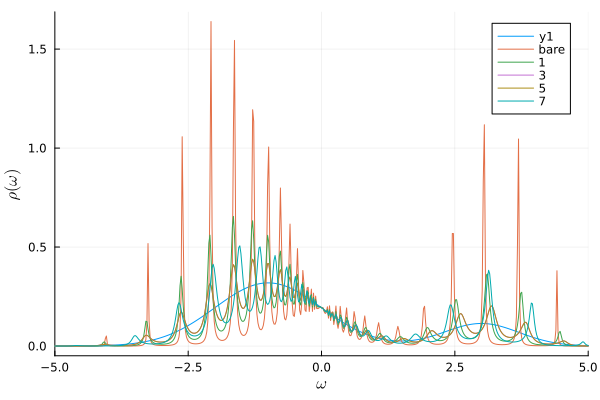

In [12]:
plot(xlim=[-5,5])
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,label="bare")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol1.val))/pi,label="1")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol3.val))/pi,label="3")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol5.val))/pi,label="5")
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol7.val))/pi,label="7")

#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol9.val))/pi,label="9")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol11.val))/pi,label="11")
#plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol13.val))/pi,label="13")

In [13]:
plt1 = plot(
    #legend = false,
    framestyle=:box,
    title = latexstring("\\mathrm{Hamburger\\, \\, \\, moment}"),
    )
plot!(annotations=(-8.25, 1.68, ("(a)", 13, 0.0, :bottom),"Times"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,label="0 moment",lw=2.5)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol3.val))/pi,label="3 moments",lw=2.5)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol7.val))/pi,label="7 moments",lw=2.5)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)

plt2 = plot(
    #legend = false,
    framestyle=:box,
    title = latexstring("\\mathrm{Smoothing}"),
    )
plot!(annotations=(-8.4, 0.52, ("(b)", 13, 0.0, :bottom),"Times"))
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol7.val))/pi,label="w/o opt",lw=3)
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi,label="w opt")
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)

plot(plt1, plt2, layout = (1, 2),
    size = (600,250),
    xlim = [-6,6],
    xticks = [-5,0,5],
    titlefont = font(13),
    legendfont=font(10, "Times"),
    guidefont=font(13), 
    xtickfont=font(10, "Times"), 
    ytickfont=font(10, "Times"), 
    ylabel=latexstring("\\rho(\\omega)"),
    xlabel=latexstring("\\omega"),
    
)
savefig("data/moments.svg")

"/home/kosuke/work/Nevanlinna.jl/notebooks/data/moments.svg"